# **Extracting Rivers from Satellite Images**

This project aims to test image processing algorithms such as Thresholding, Color Processing, Canny Algorithm, etc to extract river shapes from satellite images. Using images from INPE ([http://www.dgi.inpe.br](http://www.dgi.inpe.br/)) as input, we expect to get interesting output images that highlight the water areas of rivers.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio

In [2]:
def limiarization(img, T):

  img1 = np.zeros(img.shape)

  img1[img > T] = 1

  return img1


def optimal_T(img0, T_0):

  T = 0
  Tp = 1

  wid, hei = img0.shape

  img = limiarization(img0, T_0)

  while( np.abs(T - Tp) >= 0.5):

    avg1 = np.sum(img0, where = img == 0)
    avg2 = np.sum(img0, where = img == 1)

    img00 = img == 0
    img01 = img == 1
    count1 = np.sum(img00, where = img00 == 1)
    count2 = np.sum(img01, where = img01 == 1)

    avg1 = avg1/count1
    avg2 = avg2/count2

    Tp = T

    T = 0.5*(avg1 + avg2)

    img = limiarization(img0, T)

  return T

def normalize(img : np.ndarray, min, max):
  '''Function that converts an image to the given desired range.'''
  return ((img - np.min(img))/(np.max(img) - np.min(img)))*(max - min) + min


def gaussian_filter(k: int, sigma: float):
  '''Returns a gaussian filter from the following parameters:
     - k : int -> lateral size of the filter
     - sigma : float -> size of the blur. The higher the sigma the lower the blurred area, hence weaker the blurring effect.
  '''
     
  rangex = np.arange((-k // 2) + 1.0, (k // 2) + 1.0)
  x, y = np.meshgrid(rangex, rangex)
  filt = np.exp(-(1/2)*(np.square(x) + np.square(y)) / np.square(sigma)) 
  return filt/np.sum(filt)

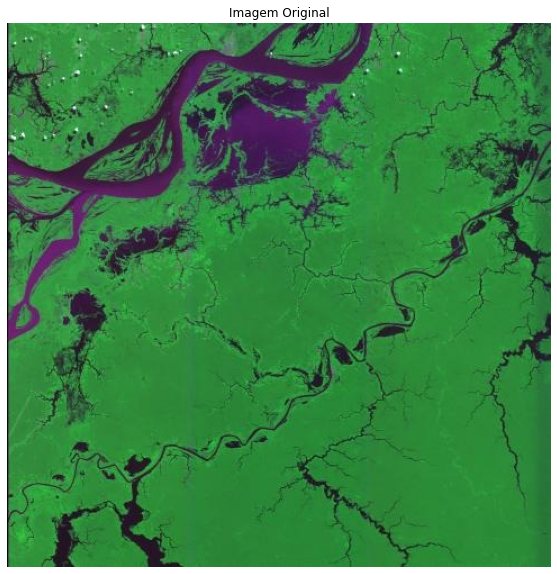

In [3]:
img = iio.imread("../imagens/clean/amaz3.jpeg")

plt.figure(figsize = (10, 10))
plt.imshow(img)
plt.title("Imagem Original")
plt.axis("off")
plt.show()

Below, the best color channel was selected to process a river. As a beggining example, the green channel was selected, as the river is highlited more in blueish tones and has less presence of green in its final color.

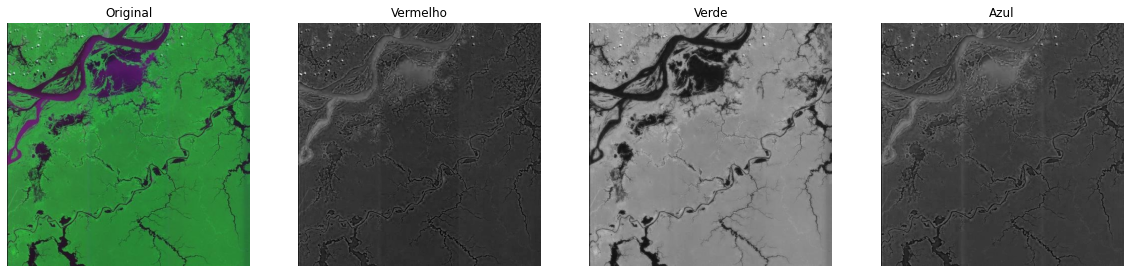

In [4]:
plt.figure( figsize = (20, 20))

plt.subplot(141)
plt.imshow(img)
plt.title("Original")
plt.axis("off")

plt.subplot(142)
plt.imshow(img[:, :, 0], cmap = "gray")
plt.title("Vermelho")
plt.axis("off")

plt.subplot(143)
plt.imshow(img[:, :, 1], cmap = "gray")
plt.title("Verde")
plt.axis("off")

plt.subplot(144)
plt.imshow(img[:, :, 2], cmap = "gray")
plt.title("Azul")
plt.axis("off")

plt.show()


#Selecionando o canal verde
img1 = img[:, :, 1]

Starting with the green channel, the limiarization process was used to segment the image into two binary parts.

(-0.5, 483.5, 483.5, -0.5)

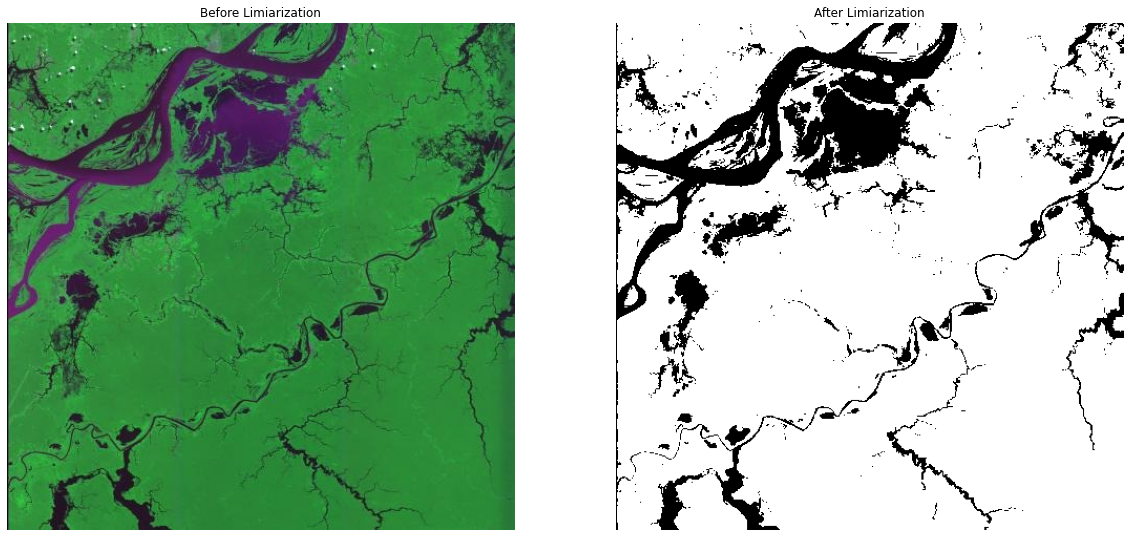

In [5]:
#Applying the limiazitation method
T = optimal_T(img1, 67)
imgfinal = limiarization(img1, T)


imgfinal = normalize(imgfinal, 0, 255).astype(np.uint8)


plt.figure(figsize = (20, 20))

plt.subplot(121)
plt.imshow(img, cmap = "gray")
plt.title("Before Limiarization")
plt.axis("off")

plt.subplot(122)
plt.imshow(imgfinal, cmap = "gray")
plt.title("After Limiarization")
plt.axis("off")